# Assignment 3
Load the dataset in the file named winequality-white.csv and set up a classification problem: predicting the quality value (y variable with seven classes labeled 3, 4, 5, …, 9) based on the values of all the other eleven variables (acidity, alcohol, pH, etc.). The goal of this assignment is to see how an MLPClassifier performs compared to a more classical ML model.


Fair warning, this will take like 20 minutes to compile because I tested around 400 different combinations of architectures and optimizer parameters.

In [2]:
# Importing pandas to use dataframes
import pandas as pd
# Reading the contents of "BDOShoham.csv" into a dataframe df
df = pd.read_csv("winequality-white.csv")
# Dropping all missing values inplace which directly modifies the dataframe
# (not necessary for this dataset)
df.dropna(inplace=True)
# Displaying the dataframe contents
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Creating data subsets for the prediction values and the classifiers
Predictors = df.drop(columns=["quality"])
Classifier = df["quality"]

In [4]:
# Importing ML libraries
from sklearn import model_selection

# Setting random seed for repeatability
seed = 2

# Splitting the data into training an testing data sets 80/20
Pred_train, Pred_test, Class_train, Class_test = model_selection.train_test_split(Predictors, Classifier, test_size=0.20, random_state=seed)

### Section 1

Train and tune the MLPClassifier (via cross-validation) using at least three different combinations of architecture choices (e.g., number of layers, # of neurons per layer, activation function). (6 points)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as pl

# Importing numpy
import numpy as np

In [6]:
# Creating the different achitectures for the MLP model
a = [(i*20,) for i in range(1,11)]
architecture = []
for x in a:
    for j in range(0,6):
        if j == 0:
            architecture.append((x[0],))
        else:
            architecture.append((x[0],j))

# Shows that 1 and 2 layer architectures are used with varrying number of neurons
print(architecture)

[(20,), (20, 1), (20, 2), (20, 3), (20, 4), (20, 5), (40,), (40, 1), (40, 2), (40, 3), (40, 4), (40, 5), (60,), (60, 1), (60, 2), (60, 3), (60, 4), (60, 5), (80,), (80, 1), (80, 2), (80, 3), (80, 4), (80, 5), (100,), (100, 1), (100, 2), (100, 3), (100, 4), (100, 5), (120,), (120, 1), (120, 2), (120, 3), (120, 4), (120, 5), (140,), (140, 1), (140, 2), (140, 3), (140, 4), (140, 5), (160,), (160, 1), (160, 2), (160, 3), (160, 4), (160, 5), (180,), (180, 1), (180, 2), (180, 3), (180, 4), (180, 5), (200,), (200, 1), (200, 2), (200, 3), (200, 4), (200, 5)]


In [7]:
# List of activation functions for hidden layers
activation = ['identity','logistic','tanh','relu']

In [9]:
# # Manual CV not neccesary but I missinterpreted part 1

# # Number of data folds for testing
# k4folds = 4
# results = {}
# print(f"Accuracy Test Results:\n")
# for a in activation:
#     result = []
#     for arch in architecture:

#         # Creating a CV splitter to pass into the cross_val_score
#         kfold = model_selection.KFold(n_splits=k4folds, shuffle=True, random_state=seed)

#         cv_results = model_selection.cross_val_score(MLPClassifier(hidden_layer_sizes=arch,activation=a,max_iter=100), Pred_train, Class_train, scoring="accuracy", cv=kfold, n_jobs=8)

#         result.append(cv_results)
        
#         print(f"Model using architecture {arch} and activation '{a}': Mean = {cv_results.mean():.6f} Std = {cv_results.std():.6f}\n")
#     print("\n")
#     results.update({a:result})

Accuracy Test Results:

Model using architecture (20,) and activation 'identity': Mean = 0.473457 Std = 0.015383

Model using architecture (20, 1) and activation 'identity': Mean = 0.466828 Std = 0.015572

Model using architecture (20, 2) and activation 'identity': Mean = 0.459412 Std = 0.013156

Model using architecture (20, 3) and activation 'identity': Mean = 0.453808 Std = 0.010470

Model using architecture (20, 4) and activation 'identity': Mean = 0.466056 Std = 0.007919

Model using architecture (20, 5) and activation 'identity': Mean = 0.462994 Std = 0.013446

Model using architecture (40,) and activation 'identity': Mean = 0.490805 Std = 0.020171

Model using architecture (40, 1) and activation 'identity': Mean = 0.457890 Std = 0.007279

Model using architecture (40, 2) and activation 'identity': Mean = 0.460187 Std = 0.013450

Model using architecture (40, 3) and activation 'identity': Mean = 0.473195 Std = 0.011655

Model using architecture (40, 4) and activation 'identity': 

KeyboardInterrupt: 

In [123]:
# # Creating a string version of architecture to serve as graph labels
# arch_str = []
# for tup in architecture:
#     arch_str.append(str(tup))

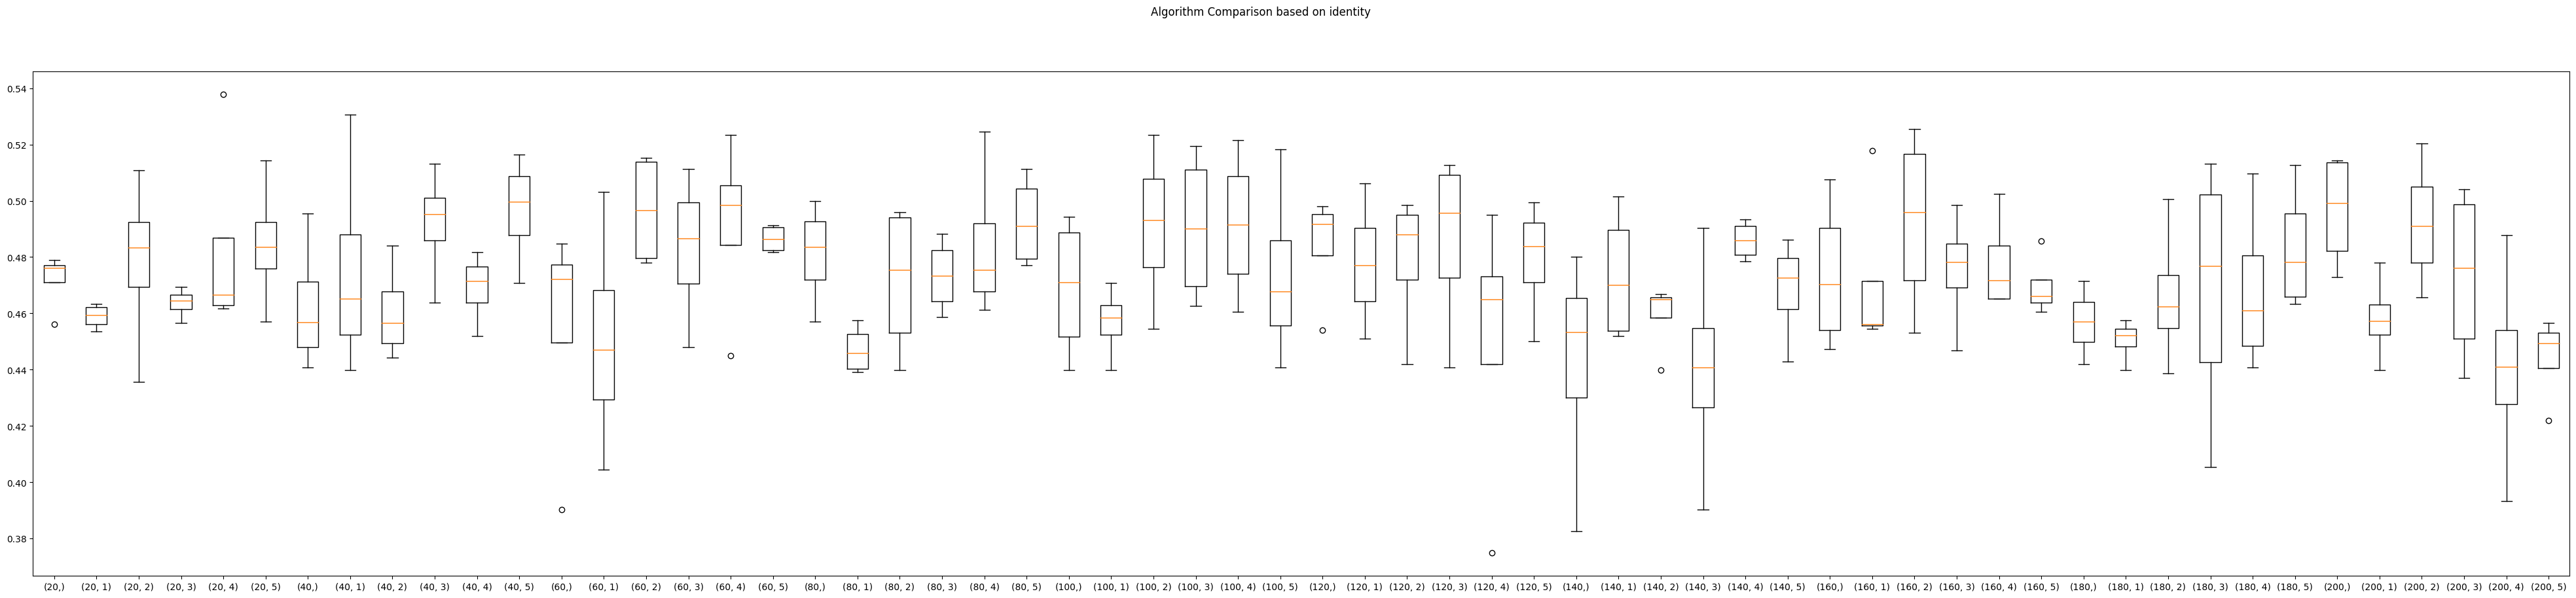

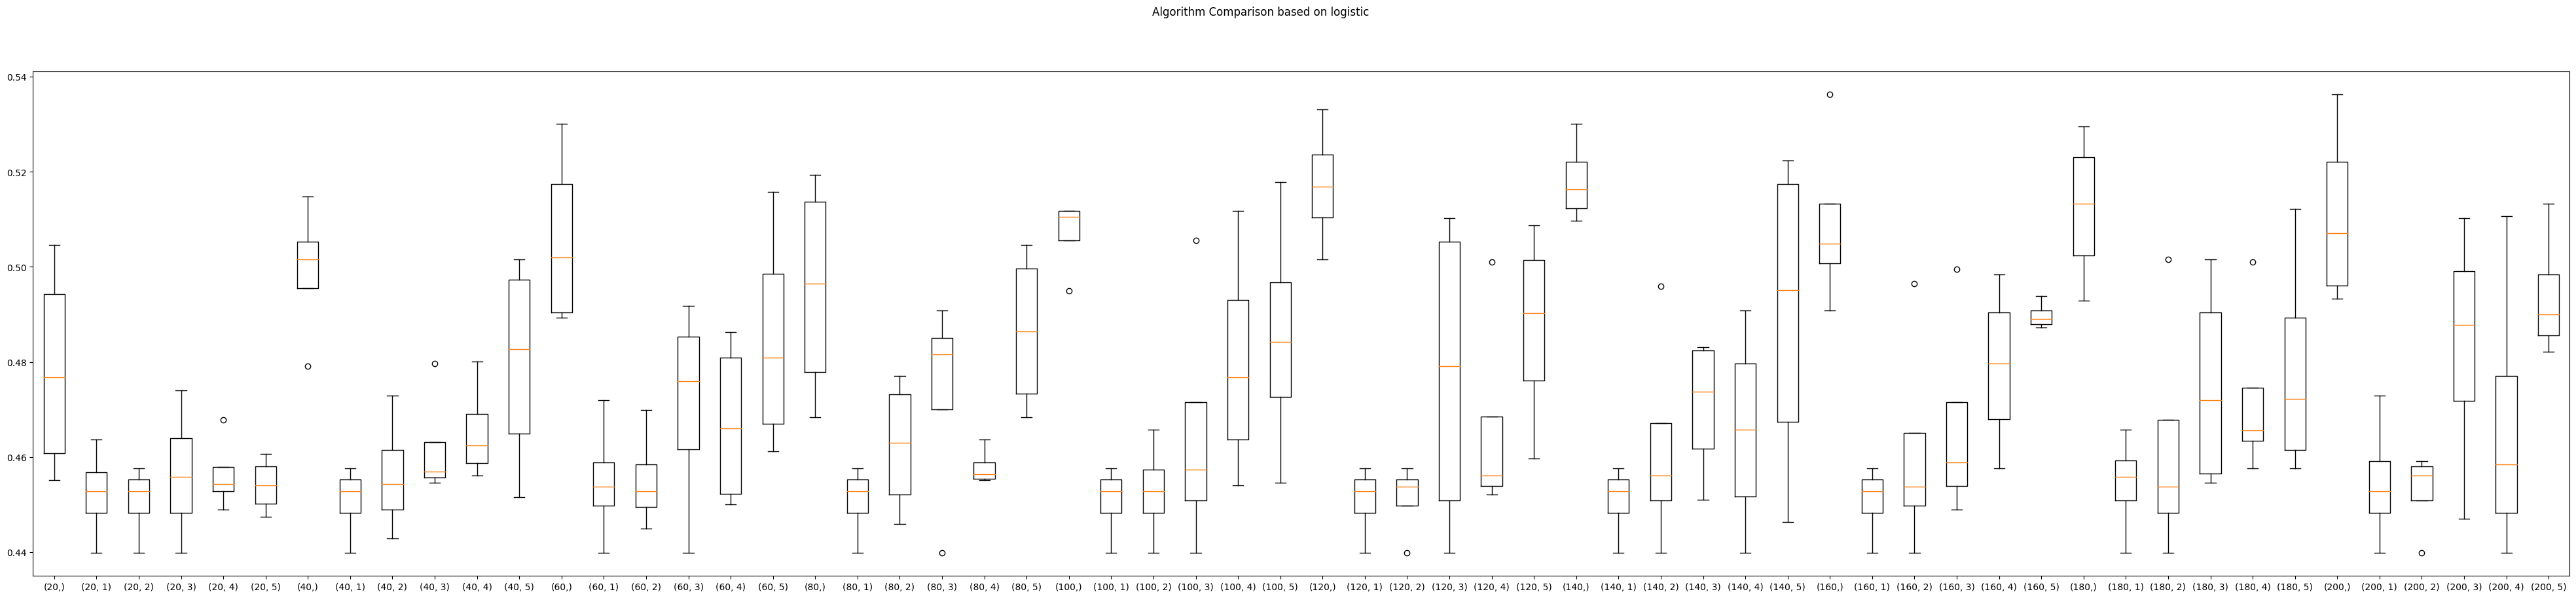

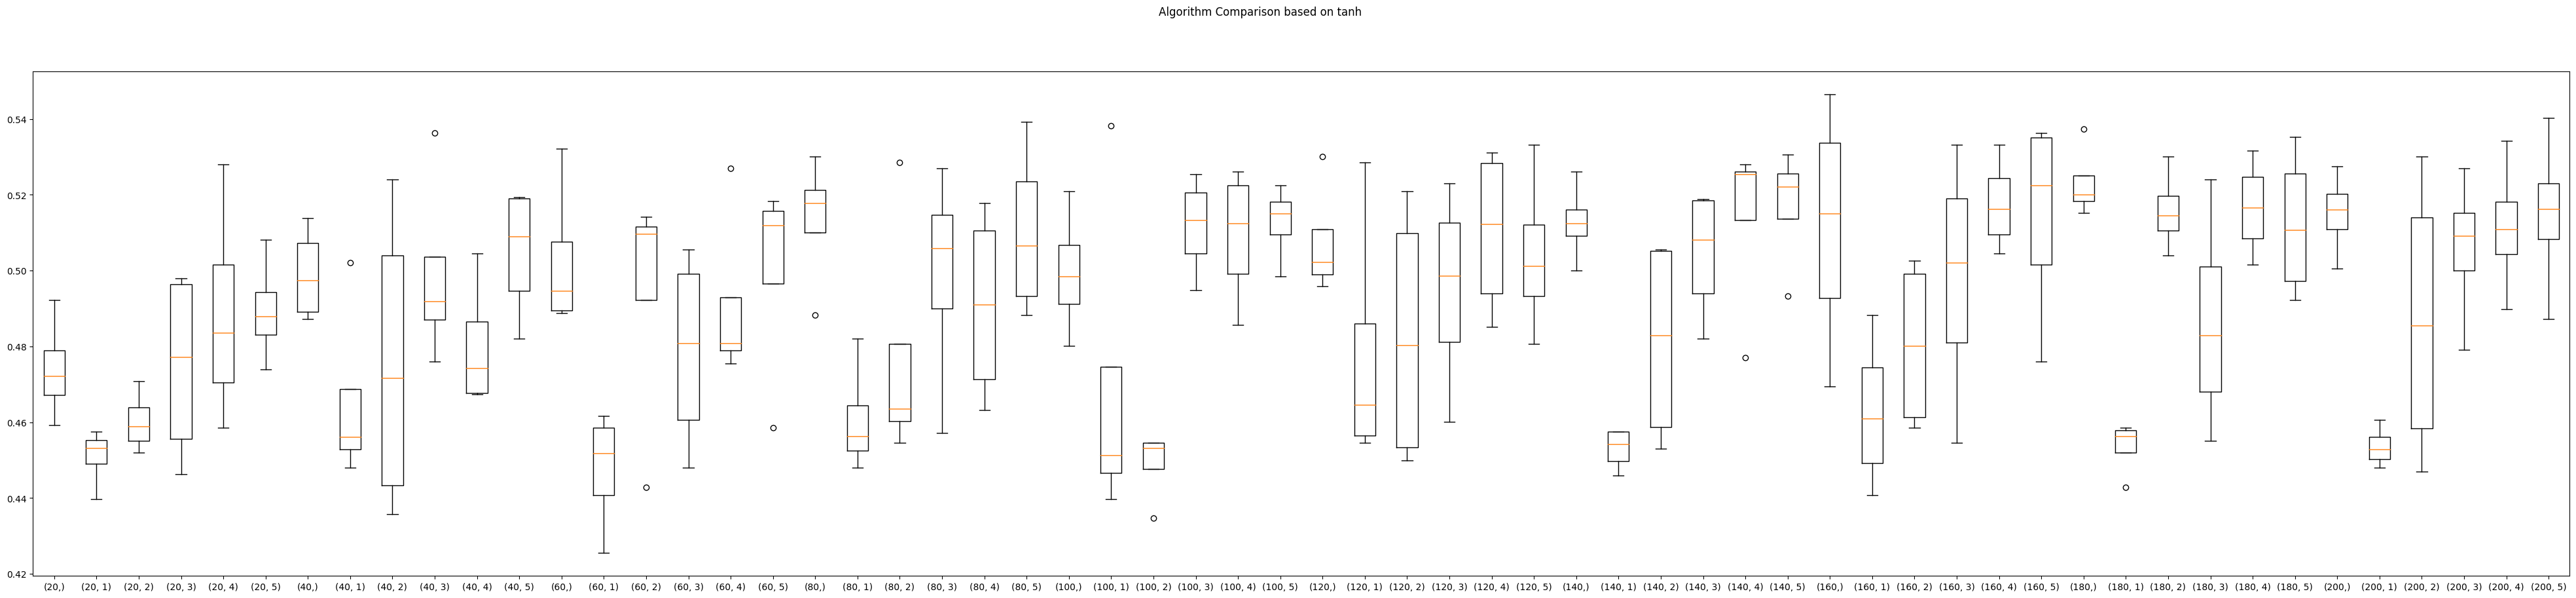

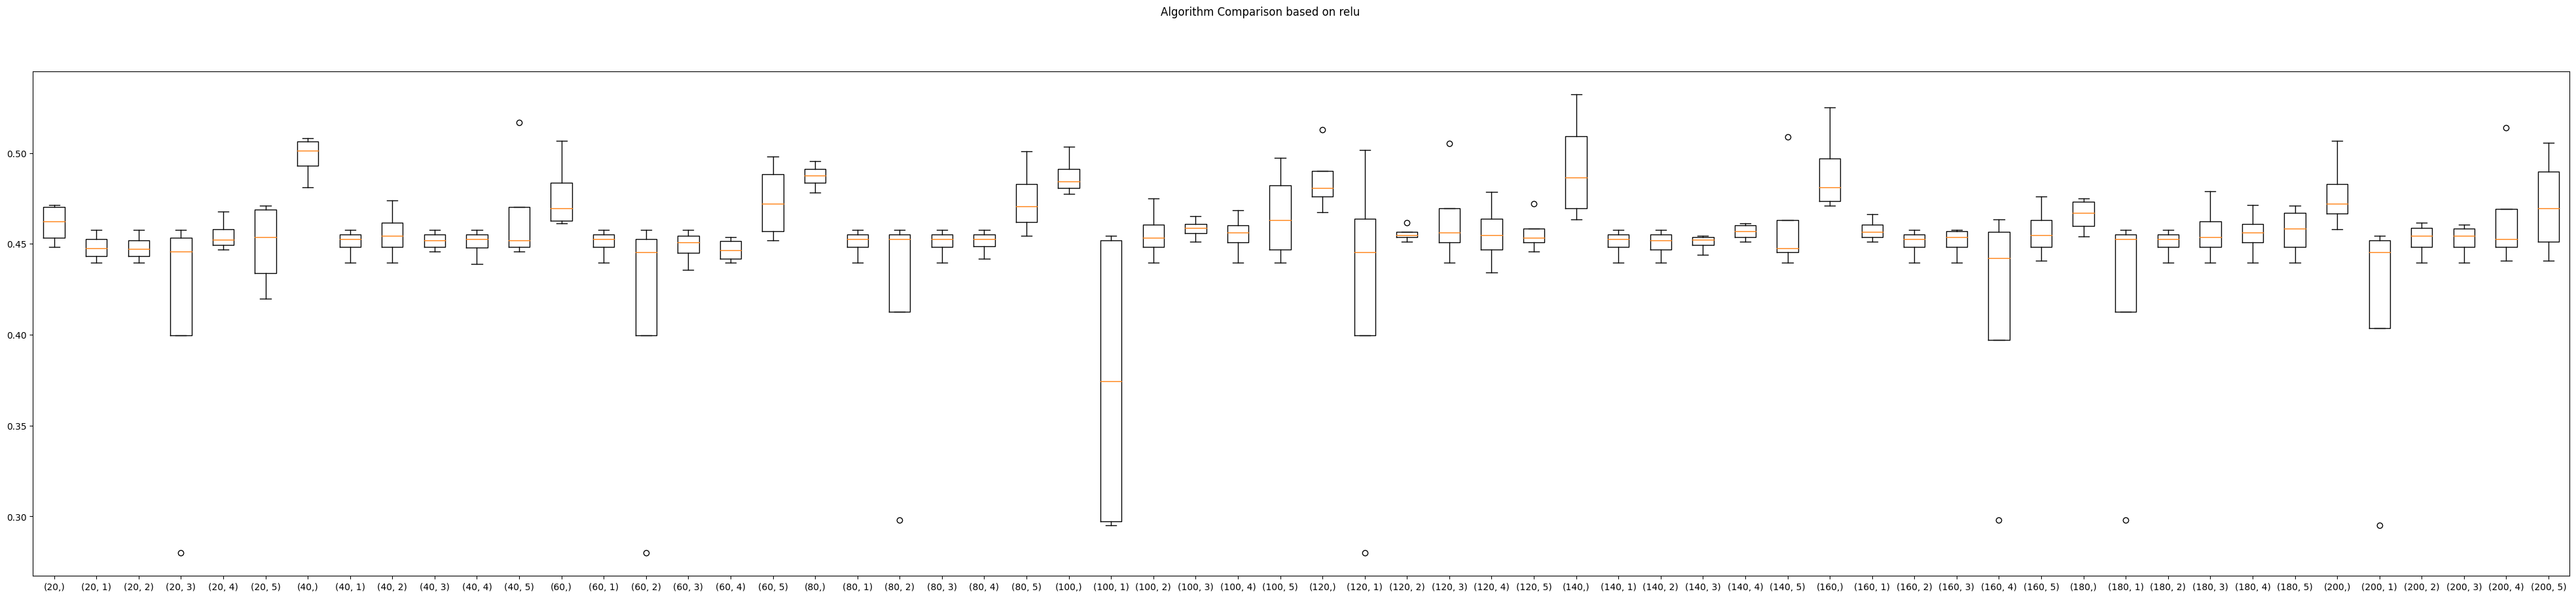

In [ ]:
# # Plotting Box and Whisker plots for different MLP achitectures
# for a in results:
#     fig = pl.figure(figsize=(50,10))
#     fig.suptitle('Algorithm Comparison based on %s' % a)
#     ax = fig.add_subplot(111)
#     pl.boxplot(results[a])
#     ax.set_xticklabels(arch_str)
#     pl.show()

In [111]:
# Importing gridsearch to allow testing of multiple parameters at once
from sklearn.model_selection import GridSearchCV

# Creating the gridsearch for multiple MLP architectures
clf = GridSearchCV(MLPClassifier(), {'hidden_layer_sizes':architecture,'activation':activation}, cv=4, scoring="accuracy", n_jobs=8)
# Fitting the models to the training data
clf.fit(Pred_train, Class_train)
#Printing relavant information about the best estimator for each model
print(f"Details for MLP:\n")
print(f"Best parameters set found on development set: {clf.best_params_}\n")
print(f"Best score found on development set: {clf.best_score_:.6f}\n")
print(f"Index of best parameters set: {clf.best_index_}\n")
print(f"Refitting time for best model: {clf.refit_time_}s\n\n")

Details for MLP:

Best parameters set found on development set: {'activation': 'logistic', 'hidden_layer_sizes': (180,)}

Best score found on development set: 0.537521

Index of best parameters set: 108

Refitting time for best model: 8.338773488998413s




In [114]:
import pandas as pd
pd.set_option('display.max_rows', 250)

df_clf = pd.DataFrame(data=clf.cv_results_)
df_clf = df_clf[['param_activation', 'param_hidden_layer_sizes', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]
df_clf.sort_values(by='rank_test_score')

,param_activation,param_hidden_layer_sizes,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
108,logistic,"(180,)",0.530612,0.536735,0.539326,0.543412,0.537521,0.004645,1
174,tanh,"(200,)",0.530612,0.535714,0.538304,0.541369,0.536500,0.003945,2
90,logistic,"(120,)",0.538776,0.518367,0.548519,0.538304,0.535992,0.010962,3
179,tanh,"(200, 5)",0.531633,0.542857,0.529111,0.537283,0.535221,0.005310,4
102,logistic,"(160,)",0.526531,0.530612,0.533197,0.540347,0.532672,0.005029,5
156,tanh,"(140,)",0.539796,0.512245,0.527068,0.547497,0.531652,0.013370,6
159,tanh,"(140, 3)",0.526531,0.520408,0.543412,0.534219,0.531142,0.008609,7
160,tanh,"(140, 4)",0.508163,0.533673,0.554648,0.526047,0.530633,0.016672,8
96,logistic,"(140,)",0.539796,0.523469,0.542390,0.507661,0.528329,0.013964,9
138,tanh,"(80,)",0.510204,0.532653,0.549540,0.519918,0.528079,0.014728,10


The first takeaway from this gridsearchCV are that the 'logistic' and 'tanh' activation functions performed the best overall while 'ReLU' seemed to do the worst. Second, the best architectures seemed to be those that only had a single hidden layer.

### Section 2

Study and describe the performance impact of varying at least three different combinations of optimizer parameter values (e.g., solver, epoch, learning rate) for one of the architectures in Step 1. (6 points)

In [104]:
# Fixing the test parameters
test_params = {}
test_params.update(clf.best_params_)
for key in test_params:
    test_params[key] = [test_params[key]]

test_params.update({'solver':['lbfgs', 'sgd', 'adam'],
                          'alpha':np.logspace(-6,1,num=15,endpoint=True,base=10.0),
                          'learning_rate':['constant', 'invscaling', 'adaptive'],
                          'max_iter':[i for i in range(100,200,100)]})

In [40]:
# Creating the gridsearch for multiple MLP architectures
clf_param = GridSearchCV(MLPClassifier(), test_params, cv=4, scoring="accuracy", n_jobs=8)
# Fitting the models to the training data
clf_param.fit(Pred_train, Class_train)
#Printing relavant information about the best estimator for each model
print(f"Details for MLP:\n")
print(f"Best parameters set found on development set: {clf_param.best_params_}\n")
print(f"Best score found on development set: {clf_param.best_score_:.6f}\n")
print(f"Index of best parameters set: {clf_param.best_index_}\n")
print(f"Refitting time for best model: {clf_param.refit_time_}s\n\n")

Details for MLP:

Best parameters set found on development set: {'activation': 'logistic', 'alpha': 1e-06, 'hidden_layer_sizes': 180, 'learning_rate': 'invscaling', 'max_iter': 100, 'solver': 'adam'}

Best score found on development set: 0.527568

Index of best parameters set: 5

Refitting time for best model: 4.3799049854278564s




In [108]:
df_param = pd.DataFrame(data=clf_param.cv_results_)
df_param = df_param[['param_activation', 'param_alpha', 'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter', 'param_solver', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]
df_param.sort_values(by='rank_test_score')

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,logistic,0.000001,180,invscaling,100,adam,0.515306,0.526531,0.534219,0.534219,0.527568,0.007744,1
20,logistic,0.00001,180,constant,100,adam,0.524490,0.507143,0.544433,0.518897,0.523741,0.013488,2
68,logistic,0.003162,180,invscaling,100,adam,0.517347,0.518367,0.540347,0.513790,0.522463,0.010465,3
11,logistic,0.000003,180,constant,100,adam,0.503061,0.511224,0.541369,0.531154,0.521702,0.015276,4
2,logistic,0.000001,180,constant,100,adam,0.525510,0.500000,0.540347,0.519918,0.521444,0.014457,5
8,logistic,0.000001,180,adaptive,100,adam,0.530612,0.517347,0.530133,0.505618,0.520927,0.010317,6
74,logistic,0.01,180,constant,100,adam,0.522449,0.505102,0.536261,0.515832,0.519911,0.011288,7
38,logistic,0.0001,180,constant,100,adam,0.521429,0.511224,0.520940,0.524004,0.519399,0.004861,8
65,logistic,0.003162,180,constant,100,adam,0.521429,0.508163,0.514811,0.532176,0.519145,0.008866,9
14,logistic,0.000003,180,invscaling,100,adam,0.509184,0.513265,0.529111,0.522983,0.518636,0.007855,10


The obvious takeaway from these rankings is that the 'adam' solver is the best while the 'sgd' solver is the worst. To a lesser extent it can be determined that lower alpha values generally give higher accuracy scores. The learning rate doesn't seem as important in improving the accuracy of this model.

In [115]:
# Fixing the test parameters
iter_params = {}
iter_params.update(clf_param.best_params_)
for key in iter_params:
    if key == 'max_iter':
        iter_params[key] = [i for i in range(10,110,10)]+[i for i in range(200,1200,200)]+[i for i in range(1500,4500,500)]
    else:
        iter_params[key] = [iter_params[key]]

In [99]:
# Finaly gridsearch to see how the number of iterations increases the accuracy
clf_final = GridSearchCV(MLPClassifier(), iter_params, cv=4, scoring="accuracy", n_jobs=8)
# Fitting the models to the training data
clf_final.fit(Pred_train, Class_train)
#Printing relavant information about the best estimator for each model
print(f"Details for MLP:\n")
print(f"Best parameters set found on development set: {clf_final.best_params_}\n")
print(f"Best score found on development set: {clf_final.best_score_:.6f}\n")
print(f"Index of best parameters set: {clf_final.best_index_}\n")
print(f"Refitting time for best model: {clf_final.refit_time_}s\n\n")

Details for MLP:

Best parameters set found on development set: {'activation': 'logistic', 'alpha': 1e-06, 'hidden_layer_sizes': 180, 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'adam'}

Best score found on development set: 0.535986

Index of best parameters set: 10

Refitting time for best model: 6.101643085479736s




In [100]:
df_iter = pd.DataFrame(data=clf_final.cv_results_)
df_iter = df_iter[['param_max_iter', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score']]
df_iter

,param_max_iter,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score
0,10,0.458163,0.453061,0.461696,0.463739,0.459165,0.004049
1,20,0.468367,0.465306,0.471910,0.484168,0.472438,0.007164
2,30,0.492857,0.477551,0.474974,0.493361,0.484686,0.008474
3,40,0.502041,0.480612,0.505618,0.489275,0.494386,0.010007
4,50,0.510204,0.474490,0.506639,0.485189,0.494131,0.014837
5,60,0.501020,0.495918,0.513790,0.500511,0.502810,0.006643
6,70,0.511224,0.503061,0.519918,0.499489,0.508423,0.007883
7,80,0.512245,0.503061,0.517875,0.524004,0.514296,0.007705
8,90,0.522449,0.500000,0.504597,0.503575,0.507655,0.008710
9,100,0.515306,0.510204,0.526047,0.518897,0.517614,0.005766


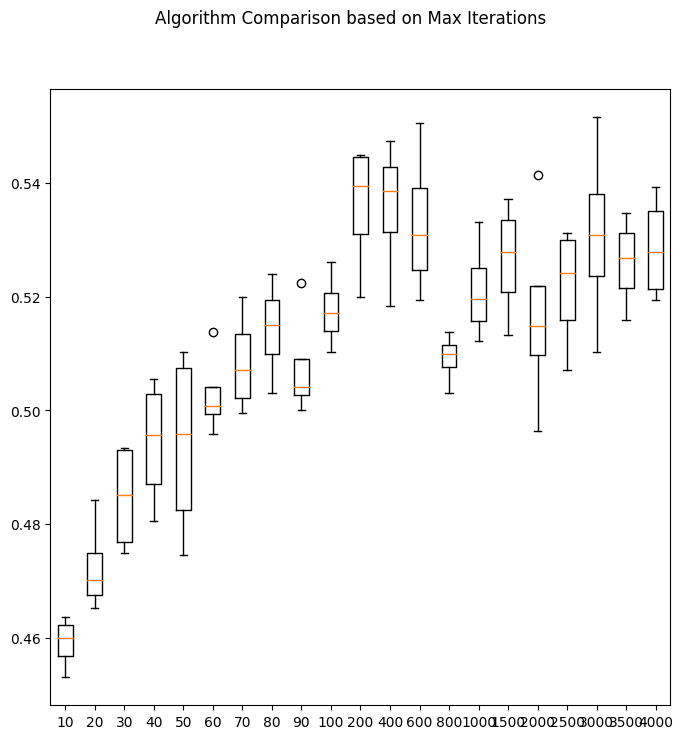

In [101]:
# Plotting Box and Whisker plots for different MLP achitectures
df_data = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score']

fig = pl.figure(figsize=(8,8))
fig.suptitle('Algorithm Comparison based on Max Iterations' )
ax = fig.add_subplot(111)
pl.boxplot(df_iter[df_data].transpose())
ax.set_xticklabels(df_iter['param_max_iter'])
pl.show()

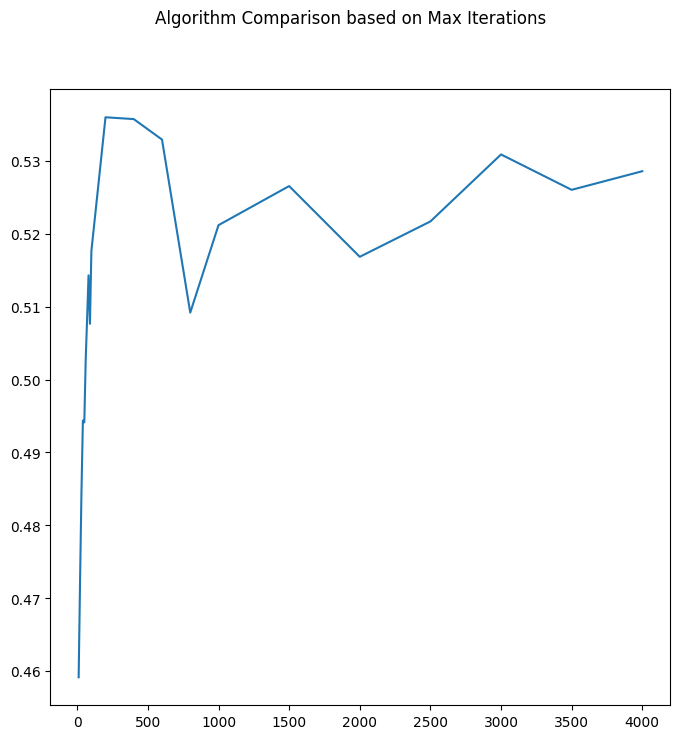

In [102]:
# Plotting Box and Whisker plots for different MLP achitectures

fig = pl.figure(figsize=(8,8))
fig.suptitle('Algorithm Comparison based on Max Iterations' )
ax = fig.add_subplot(111)
pl.plot(df_iter['param_max_iter'],df_iter['mean_test_score'])
pl.show()

There seems to be a very sharp drop off in accuracy improvement after about 200 iterations.

### Section 3

Test the performance of the best MLPClassifier from Steps 1 and 2, using two scoring methods of your choice. Discuss in detail your results. (6 points)


In [117]:


MLP1 = clf.best_estimator_
MLP2 = clf_final.best_estimator_

# MLP1 = MLPClassifier(hidden_layer_sizes=(200),activation='logistic',max_iter=200)
# MLP2 = MLPClassifier(hidden_layer_sizes=(200),activation='logistic',solver='adam',alpha=0.001,learning_rate='constant',max_iter=200)



y_predicted1 = MLP1.predict(Pred_test)
y_predicted2 = MLP2.predict(Pred_test)


print('\n clasification report MLP1:\n', classification_report(Class_test, y_predicted1))
print('\n clasification report MLP2:\n', classification_report(Class_test, y_predicted2))


 clasification report MLP1:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.25      0.06      0.10        34
           5       0.57      0.61      0.59       305
           6       0.52      0.61      0.56       432
           7       0.40      0.32      0.35       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.52       980
   macro avg       0.25      0.23      0.23       980
weighted avg       0.49      0.52      0.50       980


 clasification report MLP2:
               precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.20      0.03      0.05        34
           5       0.55      0.63      0.59       305
           6       0.53      0.67      0.59       432
           7       0.43      0.22      0.29       172
           8      

c:\Users\tb93d\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tb93d\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tb93d\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Not very much improvement over the initial selection of architecture. Makes you wonder if adjusting those optimizer parameters was worth the time. I'm not certain, but I think the warnings are because there was no example of some wine qualities in the test data set. I'm pretty sure a few of the classifiers only have 4 data points.

### Section 4

Train and tune a different classifier that is not a neural network; compare the MLPClassifier test results from Step 3 to that classifier. Discuss in detail your results. (4 points)

In [121]:
from sklearn.ensemble import RandomForestClassifier


# Finaly gridsearch to see how the number of iterations increases the accuracy
clf_rf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[10,25,50,75,100,150,200], 'criterion':['gini','entropy','log_loss']}, cv=4, scoring="accuracy", n_jobs=8)
# Fitting the models to the training data
clf_rf.fit(Pred_train, Class_train)
#Printing relavant information about the best estimator for each model
print(f"Details for Random Forest:\n")
print(f"Best parameters set found on development set: {clf_rf.best_params_}\n")
print(f"Best score found on development set: {clf_rf.best_score_:.6f}\n")
print(f"Index of best parameters set: {clf_rf.best_index_}\n")
print(f"Refitting time for best model: {clf_rf.refit_time_}s\n\n")

Details for Random Forest:

Best parameters set found on development set: {'criterion': 'entropy', 'n_estimators': 150}

Best score found on development set: 0.672540

Index of best parameters set: 12

Refitting time for best model: 1.6719131469726562s




In [122]:
y_predicted_rf = clf_rf.best_estimator_.predict(Pred_test)


print('\n clasification report RF:\n', classification_report(Class_test, y_predicted_rf))


 clasification report RF:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.57      0.12      0.20        34
           5       0.71      0.64      0.67       305
           6       0.62      0.81      0.70       432
           7       0.75      0.55      0.63       172
           8       0.92      0.33      0.49        33
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.51      0.35      0.39       980
weighted avg       0.68      0.67      0.65       980



c:\Users\tb93d\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tb93d\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tb93d\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

This is just depressing... Random Forest is much better than the MLP classifier and takes a fraction of the time to optimize.